<a href="https://colab.research.google.com/github/Md-Ali7/classwork/blob/main/python_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"


# Use pandas to read the CSV file directly from the URL
deaths = pd.read_csv(url)
cases = pd.read_csv(url2)

In [3]:
#cleaning the data
deaths.drop(['Province/State','Lat','Long'] ,axis=1,inplace=True)
deaths.drop(deaths[deaths['Country/Region'] == 'Winter Olympics 2022'].index, inplace=True)
deaths.drop(deaths[deaths['Country/Region'] == 'Summer Olympics 2020'].index, inplace=True)

cases.drop(['Province/State','Lat','Long'] ,axis=1,inplace=True)
cases.drop(cases[cases['Country/Region'] == 'Winter Olympics 2022'].index, inplace=True)
cases.drop(cases[cases['Country/Region'] == 'Summer Olympics 2020'].index, inplace=True)

In [4]:
# Global level sum of confirmed cases and deaths
global_confirmed = cases.iloc[:, 1:].sum(axis=0)
global_deaths = deaths.iloc[:, 1:].sum(axis=0)

global_df = pd.DataFrame({
    'Date':global_confirmed.index,
    'Confirmed_cases':global_confirmed.values,
    'Deaths':global_deaths.values
})

global_df['Daily_Cases']=global_df['Confirmed_cases'].diff().fillna(global_df['Confirmed_cases'])
global_df['Daily_Deaths']=global_df['Deaths'].diff().fillna(global_df['Deaths'])
global_df

,Date,Confirmed_cases,Deaths,Daily_Cases,Daily_Deaths
0,1/22/20,557,17,557.0,17.0
1,1/23/20,657,18,100.0,1.0
2,1/24/20,944,26,287.0,8.0
3,1/25/20,1437,42,493.0,16.0
4,1/26/20,2120,56,683.0,14.0
...,...,...,...,...,...
1138,3/5/23,676023501,6877749,56126.0,148.0
1139,3/6/23,676081541,6878115,58040.0,366.0
1140,3/7/23,676211978,6879038,130437.0,923.0
1141,3/8/23,676391424,6880483,179446.0,1445.0


In [5]:
def get_stock_data(api_key, symbol, start_date, end_date):
    # Alpha Vantage API endpoint for daily stock prices within the specified date range
    endpoint = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full&startdate={start_date}&enddate={end_date}'

    # Make the API request
    response = requests.get(endpoint)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Check if the response contains the expected data
        if 'Time Series (Daily)' in data:
            # Create a DataFrame to store the stock prices
            df = pd.DataFrame(data['Time Series (Daily)']).T
            df.index = pd.to_datetime(df.index)

            # Extract and return the open, high, low, and close values
            df = df[['1. open', '2. high', '3. low', '4. close']]
            df.columns = ['Open', 'High', 'Low', 'Close']

            return df
        else:
            print(f"Error: Response does not contain expected data for {symbol}")
            return None
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None


In [6]:
#extracting data from alpha vantage
api_key = 'XRZ2PLS1QCLU4Q4I'
start_date = '2020-01-01'  # Replace with your desired start date
end_date = '2022-01-01'    # Replace with your desired end date

# List of stocks to fetch data for
stocks = ['HD', 'LHA.DE', 'GOLD']

# Create an empty DataFrame to store the combined stock data
combined_df = pd.DataFrame()

# Fetch data for each stock and add it to the combined DataFrame
for stock_symbol in stocks:
    stock_data = get_stock_data(api_key, stock_symbol, start_date, end_date)
    if stock_data is not None:
        # Add the stock data to the combined DataFrame
        combined_df[f'{stock_symbol}_Open'] = stock_data['Open']
        combined_df[f'{stock_symbol}_High'] = stock_data['High']
        combined_df[f'{stock_symbol}_Low'] = stock_data['Low']
        combined_df[f'{stock_symbol}_Close'] = stock_data['Close']

print(combined_df)

             HD_Open   HD_High    HD_Low  HD_Close LHA.DE_Open LHA.DE_High  \
2023-12-13  334.9000  343.8350  331.9100  343.4000      8.1970      8.2700   
2023-12-12  330.4400  334.5200  330.3200  333.2000      8.1400      8.2200   
2023-12-11  329.8100  332.0900  328.8100  331.3300      8.2760      8.2990   
2023-12-08  326.0000  327.2800  325.0600  326.4700      8.3600      8.4450   
2023-12-07  326.1100  327.4100  324.6800  326.1700      8.2800      8.4210   
...              ...       ...       ...       ...         ...         ...   
1999-11-05   77.0000   78.7500   77.0000   78.0000         NaN         NaN   
1999-11-04   76.3100   76.9400   75.6900   76.0000         NaN         NaN   
1999-11-03   76.7500   76.9400   74.8800   75.2500         NaN         NaN   
1999-11-02   77.0000   77.5000   75.7500   77.0000         NaN         NaN   
1999-11-01   75.6300   77.0600   75.5600   76.2500         NaN         NaN   

           LHA.DE_Low LHA.DE_Close GOLD_Open GOLD_High GOLD_Low

In [7]:
#taking the spacific range and filling the missing values using bfill
stocks = combined_df.loc['2020-02-01':'2022-01-01']
stocks.bfill(inplace=True)
stocks.isnull().sum()

<ipython-input-7-f4946c01a7f8>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  stocks = combined_df.loc['2020-02-01':'2022-01-01']


HD_Open         0
HD_High         0
HD_Low          0
HD_Close        0
LHA.DE_Open     0
LHA.DE_High     0
LHA.DE_Low      0
LHA.DE_Close    0
GOLD_Open       0
GOLD_High       0
GOLD_Low        0
GOLD_Close      0
dtype: int64

In [8]:
stocks.reset_index(inplace=True)
stocks=stocks.rename(columns={"index":"Date"})

In [9]:
stocks

,Date,HD_Open,HD_High,HD_Low,HD_Close,LHA.DE_Open,LHA.DE_High,LHA.DE_Low,LHA.DE_Close,GOLD_Open,GOLD_High,GOLD_Low,GOLD_Close
0,2021-12-31,409.9900,416.5300,409.8850,415.0100,6.2200,6.2570,6.1000,6.1800,18.9800,19.0750,18.7800,19.0000
1,2021-12-30,411.8500,413.4400,408.4000,409.9400,6.2200,6.2570,6.1000,6.1800,18.4000,18.8900,18.3900,18.8200
2,2021-12-29,406.3800,412.3700,406.3100,410.8400,6.2800,6.3210,6.2230,6.2460,18.2400,18.6600,18.2150,18.4000
3,2021-12-28,404.9900,407.0200,403.0000,406.2200,6.2680,6.3240,6.2130,6.2950,18.4500,18.6650,18.3100,18.3700
4,2021-12-27,399.0400,404.4500,398.2100,404.0900,6.1990,6.3000,6.1510,6.2580,18.5000,18.5800,18.2650,18.4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2020-02-07,238.8400,239.5300,236.5200,237.3000,14.8850,14.9150,14.4750,14.6900,18.4500,18.5600,18.0800,18.1900
480,2020-02-06,238.0000,239.4100,237.4800,238.8400,15.1550,15.2500,14.9850,15.0000,18.1200,18.4900,18.0500,18.3500
481,2020-02-05,237.1000,238.3200,235.8600,238.1100,14.5500,15.4650,14.4700,15.0350,18.0000,18.1700,17.9600,18.0200
482,2020-02-04,234.0300,236.3600,234.0300,235.0000,14.1000,14.5700,14.0100,14.5200,18.0100,18.1500,17.6300,18.0200


In [10]:
#merging dataframes into one dataframe
stocks['Date'] = pd.to_datetime(stocks['Date'])
global_df['Date'] = pd.to_datetime(global_df['Date'])
global_df= pd.merge(global_df,
                    stocks,
                    on=['Date'],
                    how='inner')
global_df
global_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 483
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             484 non-null    datetime64[ns]
 1   Confirmed_cases  484 non-null    int64         
 2   Deaths           484 non-null    int64         
 3   Daily_Cases      484 non-null    float64       
 4   Daily_Deaths     484 non-null    float64       
 5   HD_Open          484 non-null    object        
 6   HD_High          484 non-null    object        
 7   HD_Low           484 non-null    object        
 8   HD_Close         484 non-null    object        
 9   LHA.DE_Open      484 non-null    object        
 10  LHA.DE_High      484 non-null    object        
 11  LHA.DE_Low       484 non-null    object        
 12  LHA.DE_Close     484 non-null    object        
 13  GOLD_Open        484 non-null    object        
 14  GOLD_High        484 non-null    object   

In [19]:
# changing datatype of all columns except the date column
date_column = 'Date'

for column in global_df.columns:
    if column != date_column:
        global_df[column] = pd.to_numeric(global_df[column], errors='coerce')

print(global_df.dtypes)

Date               datetime64[ns]
Confirmed_cases             int64
Deaths                      int64
Daily_Cases               float64
Daily_Deaths              float64
HD_Open                   float64
HD_High                   float64
HD_Low                    float64
HD_Close                  float64
LHA.DE_Open               float64
LHA.DE_High               float64
LHA.DE_Low                float64
LHA.DE_Close              float64
GOLD_Open                 float64
GOLD_High                 float64
GOLD_Low                  float64
GOLD_Close                float64
dtype: object


In [11]:
global_df.describe()

,Confirmed_cases,Deaths,Daily_Cases,Daily_Deaths
count,4.840000e+02,4.840000e+02,4.840000e+02,484.000000
mean,1.072081e+08,2.372542e+06,4.381070e+05,8391.729339
std,9.222554e+07,1.800228e+06,2.767396e+05,3845.335482
min,1.988700e+04,4.280000e+02,4.180000e+02,4.000000
25%,1.631674e+07,6.977835e+05,2.416208e+05,6135.250000
50%,9.535989e+07,2.122396e+06,4.549630e+05,8146.500000
75%,1.879376e+08,4.073335e+06,6.258518e+05,10671.750000
max,2.887274e+08,5.469019e+06,1.950126e+06,20699.000000


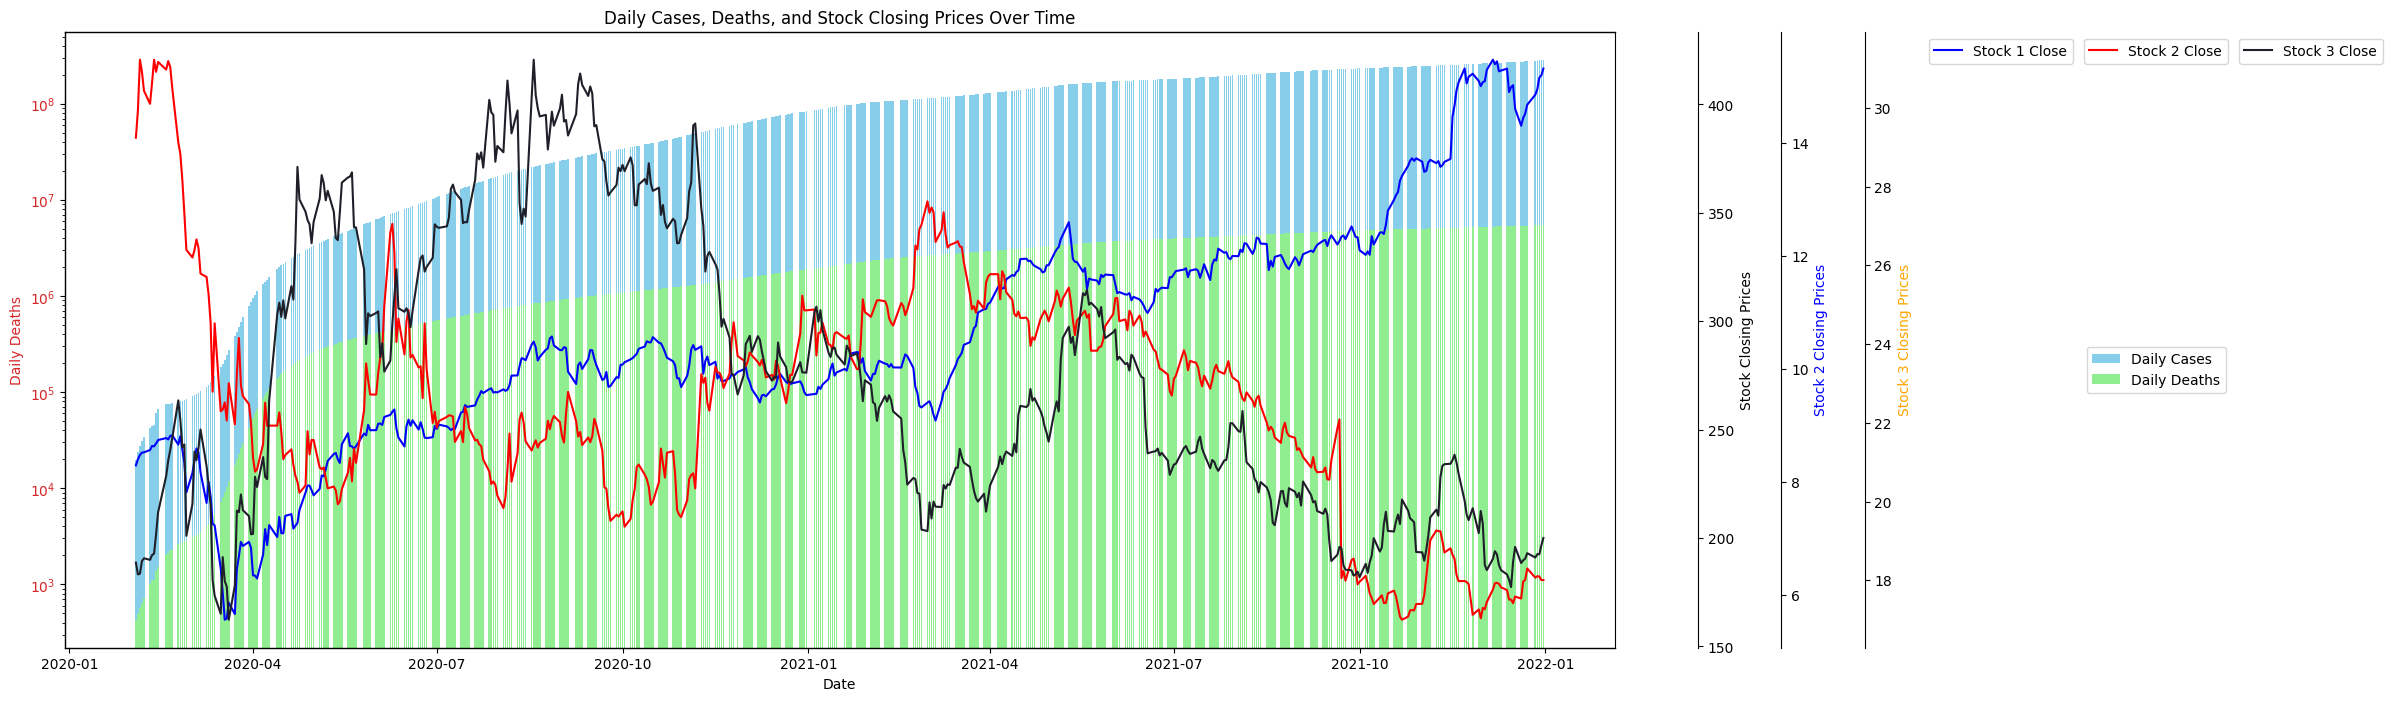

In [66]:
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot daily cases on the left y-axis (primary y-axis)
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Cases', color='tab:blue')
ax1.bar(global_df['Date'], global_df['Confirmed_cases'], label='Daily Cases', color='skyblue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_yscale('log')

# Create a second y-axis for daily deaths on the left y-axis (primary y-axis)
# ax2 = ax1.twinx()
ax1.set_ylabel('Daily Deaths', color='tab:red')
ax1.bar(global_df['Date'], global_df['Deaths'], label='Daily Deaths', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a third y-axis for stock prices on the right y-axis (secondary y-axis)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
ax3.set_ylabel('Stock Closing Prices', color='black')

# Plot closing prices for Stock 1
ax3.plot(global_df['Date'], global_df['HD_High'], label='Stock 1 Close', color='blue')

# Create a new y-axis for Stock 2 on the right y-axis (secondary y-axis)
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Adjust the position of the new axis
ax4.set_ylabel('Stock 2 Closing Prices', color='blue')

# Plot closing prices for Stock 2 on the new y-axis
ax4.plot(global_df['Date'], global_df['LHA.DE_High'], label='Stock 2 Close', color='red')

# Create another y-axis for Stock 3 on the right y-axis (secondary y-axis)
ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 180))  # Adjust the position of the new axis
ax5.set_ylabel('Stock 3 Closing Prices', color='orange')

# Plot closing prices for Stock 3 on the new y-axis
ax5.plot(global_df['Date'], global_df['GOLD_High'], label='Stock 3 Close', color='#1E1F29')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
lines5, labels5 = ax5.get_legend_handles_labels()

ax1.legend(lines1 , labels1, loc='upper left', bbox_to_anchor=(1.3, 0.5))
ax3.legend(lines3, labels3, loc='upper right', bbox_to_anchor=(1.3, 1))
ax4.legend(lines4, labels4, loc='upper right', bbox_to_anchor=(1.4, 1))
ax5.legend(lines5, labels5, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.title('Daily Cases, Deaths, and Stock Closing Prices Over Time')
plt.show()


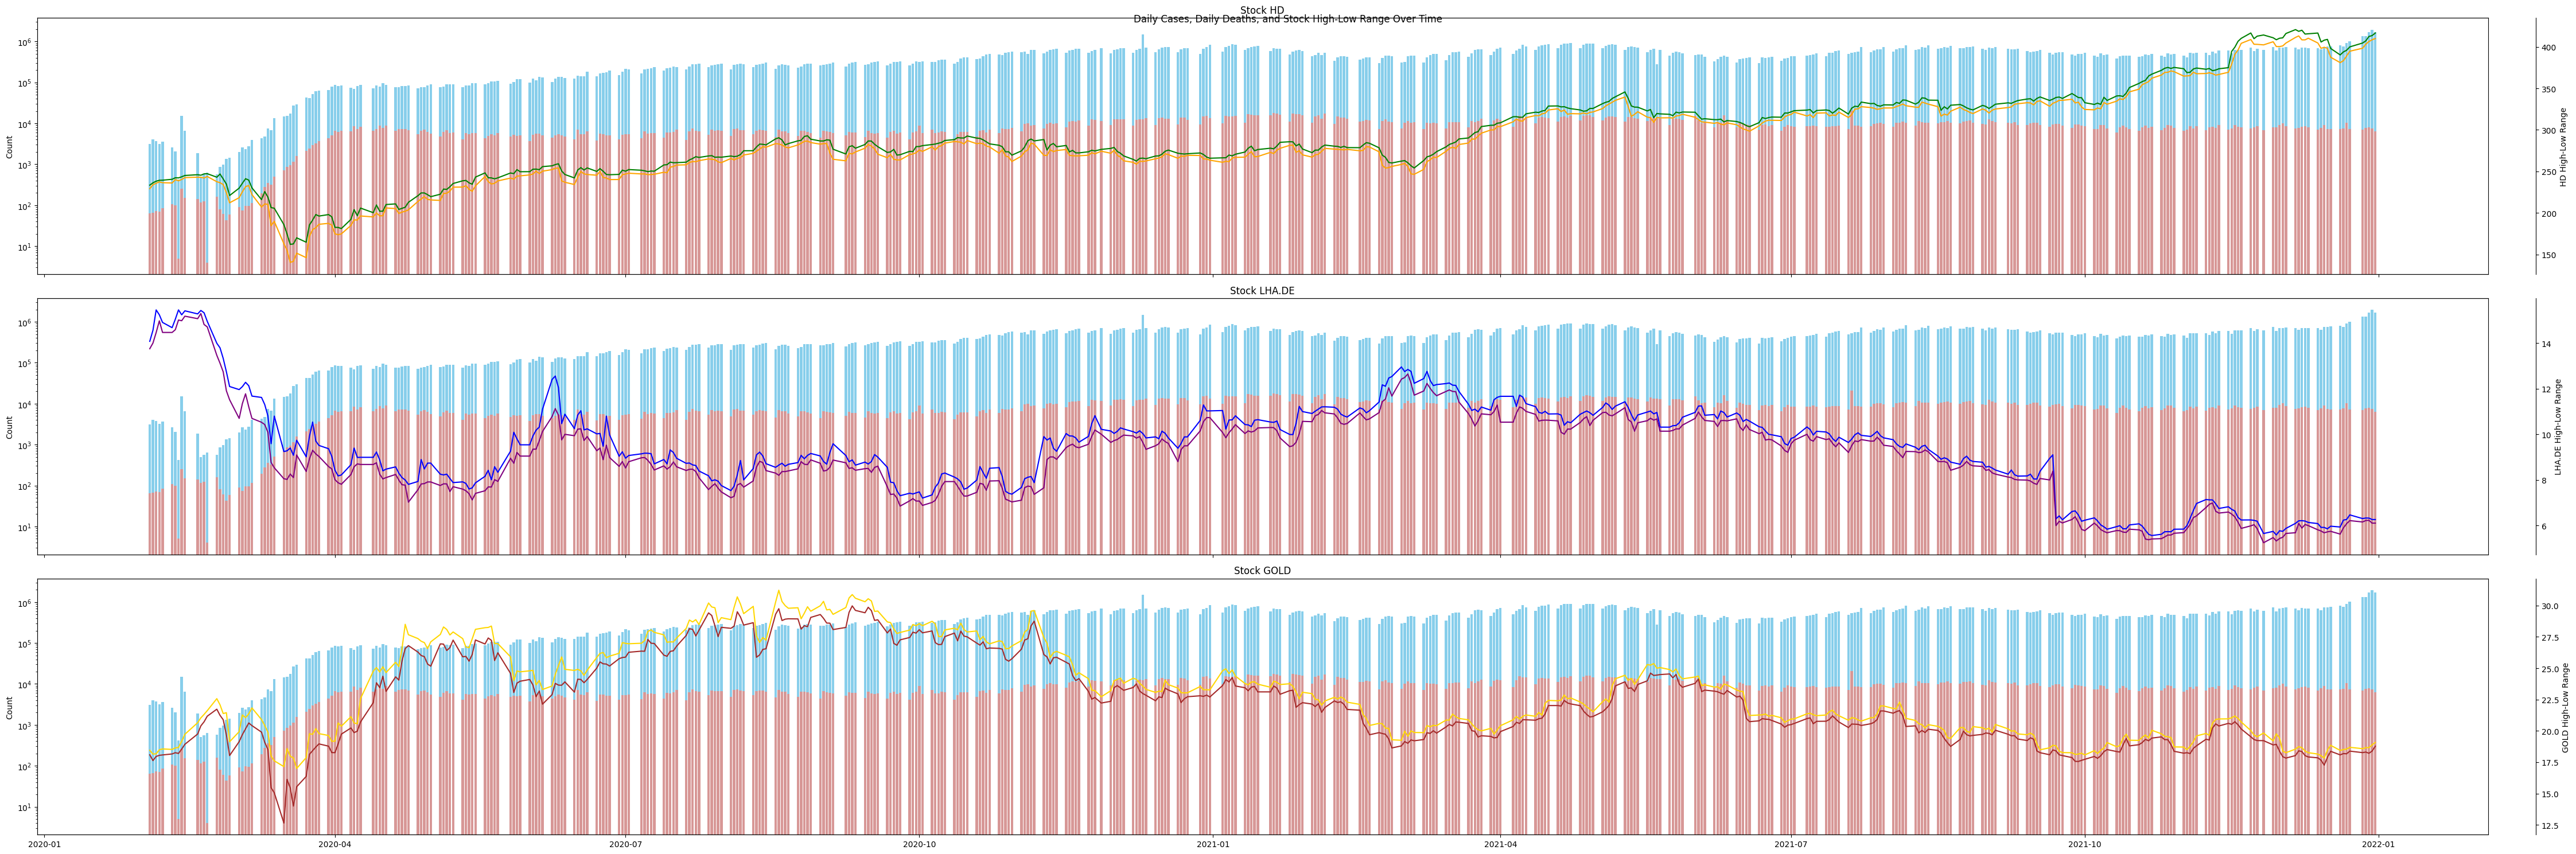

In [64]:
fig, axs = plt.subplots(3, 1, figsize=(45, 15), sharex=True)

# Plot 1: Daily Cases, Daily Deaths, and HD High-Low Range
axs[0].set_ylabel('Count')
axs[0].bar(global_df['Date'], global_df['Daily_Cases'], label='Daily Cases', color='skyblue')
axs[0].bar(global_df['Date'], global_df['Daily_Deaths'], label='Daily Deaths', color='salmon', alpha=0.7)
axs[0].set_title('Stock HD')
axs[0].set_yscale('log')

# Create a twin axes for HD on the right y-axis (secondary y-axis)
axs2 = axs[0].twinx()
axs2.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
axs2.plot(global_df['Date'], global_df['HD_High'], label='HD High', color='green')
axs2.plot(global_df['Date'], global_df['HD_Low'], label='HD Low', color='orange')
axs2.set_ylabel('HD High-Low Range')

# Plot 2: Daily Cases, Daily Deaths, and LHA.DE High-Low Range
axs[1].set_ylabel('Count')
axs[1].bar(global_df['Date'], global_df['Daily_Cases'], label='Daily Cases', color='skyblue')
axs[1].bar(global_df['Date'], global_df['Daily_Deaths'], label='Daily Deaths', color='salmon', alpha=0.7)
axs[1].set_title('Stock LHA.DE')
axs[1].set_yscale('log')

# Create a twin axes for LHA.DE on the right y-axis (secondary y-axis)
axs3 = axs[1].twinx()
axs3.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
axs3.plot(global_df['Date'], global_df['LHA.DE_High'], label='LHA.DE High', color='blue')
axs3.plot(global_df['Date'], global_df['LHA.DE_Low'], label='LHA.DE Low', color='purple')
axs3.set_ylabel('LHA.DE High-Low Range')

# Plot 3: Daily Cases, Daily Deaths, and GOLD High-Low Range
axs[2].set_ylabel('Count')
axs[2].bar(global_df['Date'], global_df['Daily_Cases'], label='Daily Cases', color='skyblue')
axs[2].bar(global_df['Date'], global_df['Daily_Deaths'], label='Daily Deaths', color='salmon', alpha=0.7)
axs[2].set_title('Stock GOLD')
axs[2].set_yscale('log')

# Create a twin axes for GOLD on the right y-axis (secondary y-axis)
axs4 = axs[2].twinx()
axs4.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
axs4.plot(global_df['Date'], global_df['GOLD_High'], label='GOLD High', color='gold')
axs4.plot(global_df['Date'], global_df['GOLD_Low'], label='GOLD Low', color='brown')
axs4.set_ylabel('GOLD High-Low Range')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

plt.suptitle('Daily Cases, Daily Deaths, and Stock High-Low Range Over Time')
plt.show()


The chosen plot, which displays daily cases, daily deaths, and the high-low range for a single stock using twinx to create separate y-axes for each, has specific advantages for visualizing this type of data:


*   **Comparison of Multiple Variables**: The plot allows for a direct visual comparison between daily cases, daily deaths, and the high-low range for a single stock. This is useful when you want to observe potential correlations or patterns between covid-related variables and stock performance.
*  **Separate Y-Axes for Different Scales:** When creating a plot with multiple variables, it's important to use twinx for each variable. This ensures that each variable is plotted on its own y-axis with a distinct scale. This is particularly important when dealing with different types of data, such as daily cases and deaths versus stock high-low ranges, which involve different scales of continuous numerical values. By using separate scales, we can prevent one variable from dominating the visual representation.
*   **Insight into Relationships:** The plot displays daily COVID-related variables and stock high-low ranges side by side. This allows for an exploration of potential relationships or trends between the two types of data. For instance, there may be a correlation between spikes in daily cases or deaths and specific stock movements, which can be analyzed observationally.
*   **Contextualization of Data Dynamics:** Combining health-related and financial data in a single plot can provide a comprehensive view of how these variables interact over time. This context can be valuable for researchers or analysts who are trying to understand the broader dynamics of a particular stock in relation to health-related events.



